<font size="6">MEC301 - Métodos Numéricos</font>
# Repaso Parte 1 -  Introducción a los métodos numéricos
Profesor: Francisco Ramírez Cuevas<br>

## Sistemas de ecuaciones lineales
La librería ```numpy.linalg``` tiene diversas herramientas para resolver y caracterizar sistemas de ecuaciones en python.

Consideremos un sistema de ecuaciones de la forma

\begin{eqnarray*}
3x_1 + 1x_2 - 5x_3 &=& 2 \\
-2x_1 - 2x_2 + 5x_3 &=& 5 \\
8x_1 + 1\times10^{10}x_2 + 2x_3 &=& -3 \\
\end{eqnarray*}

### Solución del sistema (```numpy.linalg.solve```)
Para resolver esto en python, primero debemos escribir el sistema en forma matricial:

In [1]:
import numpy as np
A = np.array([[ 3,  1, -5],
              [-2, -2,  5],
              [ 8,  1E10,  2]])

y = np.array([[2], 
              [5], 
              [-3]])

La solución a este sistema se obtiene mediante ```numpy.linalg.solve```

In [2]:
import numpy as np
xsol = np.linalg.solve(A,y)
print('La solución es x =\n',xsol)

La solución es x =
 [[ 6.99999999e+00]
 [-6.65999999e-09]
 [ 3.79999999e+00]]


### Condicionamiento de la matriz (```numpy.linalg.cond```)

Una forma de caracterizar el sistema es mediante el **número de condición**. En python ```numpy.linalg.cond```

In [3]:
print('Número de condicionamiento, cond(A) =', np.linalg.cond(A))

Número de condicionamiento, cond(A) = 15824113618.647936


El número de condición está directamente relacionado con el determinante de la matriz. Si $\mathrm{cond}(A)$ es muy grande, entonces $\mathrm{det}(A)\approx 0$. Así:

**A mayor número de condicionamiento, mayor es la probabilidad de inducir errores de redondeo, overflow o underflow en la solución.**

### Cuantificación del error (```numpy.linalg.norm```)
Podemos revisar el error mediante la norma Frobenius. En python, usamos ```numpy.linalg.norm```

En este ejemplo, comprobamos el error de la solción con $\|Ax - y\|$

In [4]:
print('Error |A*xsol - y|', np.linalg.norm(np.dot(A,xsol) - y))

Error |A*xsol - y| 5.329070518200751e-15


### Número de soluciones posibles (```numpy.linalg.matrix_rank```)

Para analizar si el sistema tiene solución única, infintas soluciones o no tiene solución, evaluamos los $\mathrm{rank}(A)$ y $\mathrm{rank}([A|y])$, y el número de incognitas $n$. 

En python usamos ```numpy.linalg.matrix_rank``` para determinar el rango, y ```len(y)``` para determinar $n$.

In [5]:
from numpy.linalg import matrix_rank
Ay = np.concatenate((A,y),axis=1) # generamos matrix aumentada
rankA  = matrix_rank(A)           # rango de A
rankAy = matrix_rank(Ay)          # rago de A|y
n = len(y)                        # número de incognitas

if rankAy == rankA:
    if rankA == n: print('El sistema tiene solución única')
    if rankA < n: print('El sistema tiene infinitas soluciones')
elif rankAy == rankA + 1: print('El sistema no tiene soluciones')

El sistema tiene solución única


## Ajuste por mínimos cuadrados

Queremos encontrar los parámetros $\alpha$, $\beta$ y $\rho$ del siguiente modelo:

\begin{equation*}
U(v,t) = \alpha \frac{(v + 2)^{\beta}}{(t + 3)^{3\rho}}
\end{equation*}

que se ajustan mejor a los datos $v_i$, $t_i$ y $U_i$, dados por:

In [6]:
import numpy as np
vi = np.array([ 0.2363,  0.7447,  0.0632, -0.7255,  0.1367, -0.2126, -0.9105,  0.8601,
                0.7831, -0.1936, -0.085 , -0.6484, -0.6699,  0.0654, -0.4349])

ti = np.array([ 0.7537, -0.7364, -0.9443, -0.6301,  0.1792, -0.6012,  0.3107,  0.1379,
               -0.1263, -0.2106,  0.552 ,  0.019 ,  0.8273, -0.0741, -0.0453])

Ui = np.array([ 0.0170,  0.1483,  0.1179,  0.0272,  0.0268,  0.056 ,  0.0066,  0.0529, 
                0.0689,  0.0344,  0.0151,  0.0142,  0.0052,  0.0371,  0.0214])

### Regresión lineal (```numpy.linalg.pinv``` o ```.lstsq```)

Una manera de obtener $\alpha$, $\beta$ y $\rho$ es medinte regresión lineal a partir de un modelo linealizado.

**paso 1.** Linealizamos el modelo:
\begin{equation*}
U(v,t) = \alpha \frac{(v + 2)^{\beta}}{(t + 3)^{3\rho}} \Rightarrow  \ln(U) = \ln(\alpha) + \beta\ln(v + 2) - \rho~ \ln(t+3)^3
\end{equation*}

Obtenemos un modelo lineal 2D de la forma $y = a_0 + a_1x_1 + a_2x_2$, con:
- $y = \ln(U)$
- $a_0 = \ln(\alpha)$
- $a_1 = \beta$
- $x_1 = \ln(v + 2)$
- $a_2 = -\rho$
- $x_2 = \ln(t+3)^3$

**paso 2.** Transformamos los datos $v_i$, $t_i$ y $U_i$ al modelo linealizado

In [7]:
x1i = np.log(vi + 2)
x2i = np.log((ti+3)**3)
yi  = np.log(Ui)

**paso 3.** A partir del modelo general $y = a_0z_0+a_1z_1+a_2z_2+...a_nz_n$, creamos la matriz:

\begin{equation*}
Z =\begin{bmatrix}
1 & x_{1,1} & x_{2,1}\\
1 & x_{1,2} & x_{2,2}\\
\vdots & \vdots & \vdots \\
1 & x_{1,m} & x_{2,m}
\end{bmatrix}
\end{equation*}


In [8]:
Z = np.vstack((x1i**0, x1i**1, x2i**1)).T

**paso 4.** Hacemos ajuste por mínimos cuadrados. En python, a través de la librería ```numpy.linalg```, tenemos dos alternativas:
- Método matriz psudoinversa, $Z_\mathrm{pinv} = \left(Z^T Z\right)^{-1}Z^T$ (```pinv```)
```python
Z_pinv = np.linalg.pinv(Z) # Matríz Z pseudo inversa
a = np.dot(Z_pinv,yi)      # Parámetros del modelo lineal
```
- Mínimos cuadrados (```lstsq```)
```python
a = np.linalg.lstsq(Z, yi, rcond=None)[0] # Parámetros del modelo lineal
```

In [9]:
a = np.dot(np.linalg.pinv(Z),yi)
print('modelo lineal, y = %.3f + %.3fx_1 + %.3fx_2' % tuple(a))

modelo lineal, y = -0.959 + 1.973x_1 + -1.184x_2


**paso 5** Extraemos los parámetros del modelo original. En este caso:
- $\alpha = e^{a_0}$
- $\beta = a_1$
- $\rho = -a_2$

In [10]:
alpha = np.exp(a[0])
beta  = a[1]
rho   = - a[2]
print('alpha = %.3f, beta = %.3f, gamma = %.3f' % (alpha, beta, rho))

alpha = 0.383, beta = 1.973, gamma = 1.184


### Regresión no lineal (```scipy.optimize.curve_fit```)
En el caso de regresión no lineal, el proceso es más sencicllo. En python, ocupamos la función ```curve_fit``` de la librería ```scipy.optimize```.

In [11]:
from scipy.optimize import curve_fit

def model(x,a,b,c):
    U = a*(x[0] + 2)**b/(x[1] + 3)**(3*c)
    return U
    
xdata = np.vstack((vi,ti))
ydata = Ui

a_nl = curve_fit(model,xdata,ydata)[0]
print('alpha = %.3f, beta = %.3f, gamma = %.3f' % (a_nl[0], a_nl[1], a_nl[2]))

alpha = 0.336, beta = 1.925, gamma = 1.126


### Calidad del modelo (```sklearn.metrics.r2_score```)
Evaluamos la calidad del modelo mediante el coeficiente de determinación. En python usamos la función ```r2_score``` de ```sklearn.metrics```.

Primero creamos una función para nuestro modelo. En este caso crearemos dos funciones: 
- ```U_lin``` para el modelo con los párametros obtenidos por regresión lineal
- ```U_nl``` para el modelo con los párametros obtenidos por regresión lineal

In [12]:
U_lin = lambda v,t: alpha*(v+2)**beta/(t + 3)**(3*rho) # regresión lineal
U_nl  = lambda v,t: a_nl[0]*(v+2)**a_nl[1]/(t + 3)**(3*a_nl[2]) # regresión no-lineal

In [13]:
from sklearn.metrics import r2_score
print('r2 (reg. lineal) = ',    r2_score(U_lin(vi,ti), Ui))
print('r2 (reg. no-lineal) = ', r2_score(U_nl(vi,ti) , Ui))

r2 (reg. lineal) =  0.9964786187961536
r2 (reg. no-lineal) =  0.9989416972396143


## Interpolación

Queremos generar un polinómio de interpolación para el siguiente set de mediciones:

In [14]:
xi = [-2.9924, -2.3285, -1.6177, -0.9819, -0.312 ,  
       0.3933,  1.0589,  1.7526,  2.3346,  3.0171]

yi = [1.000e-04, 4.400e-03, 7.300e-02, 3.813e-01, 9.072e-01, 
      8.567e-01, 3.258e-01, 4.630e-02, 4.300e-03, 1.000e-04]

### Interpolación polinomimal
En python tenemos distintos métodos para generar polinomios de interpolación. En el curso vimos 3 métodos:

- Usando mínimos cuadrados, mediante la librería ```numpy```:
```python 
import numpy as np
ai = np.polyfit(xi,yi,len(xi) - 1) # generamos los coeficientes del polinomio
y0 = np.polyval(ai, x0)            # evaluamos el polinomio en x0 para encontrar y0
```

- Polinomios de Newton, mediante el script ```newton.py``` desarrollado en clases:
```python 
import newton as nw
ai = nw.divided_diff(xi,yi)       # generamos los coeficientes del polinomio de Newton
y0 = nw.newnton_poly(ai, xi, x0)  # evaluamos el polinomio en x0 para encontrar y0
```
- Polinomios de Lagrange, mediante la librería ```scipy.interpolate```.
```python 
from scipy.interpolate import lagrange
y_interpol = lagrange(xi,yi)    # generamos una función de interpolación
y0 = y_interpol(x0)             # evaluamos el polinomio en x0 para encontrar y0
```

Notar que tanto el método de regresión lineal como polinomios de newton **se basan en una función para generar los coeficientes** (```polyfit``` y ```divided_diff```, respectivamente), y **luego otra función para evaluar el polinomio de interpolación** (```polyval``` y ```newton_poly```, respectivamente)

El método de polinomios de Lagrange, en cambio, **se basa en la función ```lagrange``` para generar una función de interpolación** (output del tipo "*callable*" en lenguage python). 

#### Generación de polinomios

En el siguiente script, utilizamos las tres funciones para generar una **función de interpolación**. Notar que usamos función ```lambda``` para regresión lineal y polinomios de newton:

In [15]:
import newton as nw # funciones del script newton.py
from scipy.interpolate import lagrange

# regresión lineal
a_lr = np.polyfit(xi,yi,len(xi)-1)              # generamos los coeficientes del polinomio
y_linreg   = lambda x: np.polyval(a_lr,x)       # creamos un output tipo "callable" a través de función lambda

# polinomios de Newton
a_nw = nw.divided_diff(xi,yi)                   # generamos los coeficientes del polinomio
y_newton = lambda x: nw.newton_poly(a_nw,xi, x) # creamos un output tipo "callable" a través de función lambda

# polinomios de lagrange   
y_lagrange = lagrange(xi,yi)                     # creamos un output tipo "callable"

#### Comparación de modelos

Ahora graficamos nuestro resultado para los tres casos en el dominio $x\in[-3,3]$ generando un arreglo con 100 puntos igualmente espaciados.

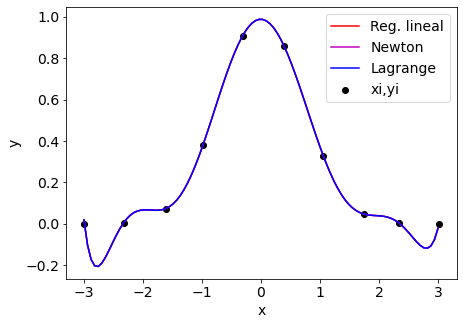

In [16]:
import matplotlib.pyplot as plt

x = np.linspace(-3,3,100)

plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 14}) # Tamaño de fuente

plt.plot(x, y_linreg(x),'-r', label='Reg. lineal')
plt.plot(x, y_newton(x),'-m', label='Newton')
plt.plot(x, y_lagrange(x),'-b', label='Lagrange')
plt.scatter(xi,yi,color='k',label='xi,yi')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Interpolación por tramos o *spline* (```scipy.interpolate```)
En el caso de interpolación por tramos o "*spline*, en clases revisamos dos alternativas de la librería ```scipy.interpolate```:

- Interpolación *spline* lineal mediante ```interp1d```:
```python
from scipy.interpolate import interp1d
y_slinear = interp1d(xi,yi) # generamos una función de interpolación
y0 = y_slinear(x0)          # evaluamos el polinomio en x0 para encontrar y0
```
- Interpolación *spline* cúbico mediante ```CubicSpline```:
```python
from scipy.interpolate import CubicSpline
y_scubic = CubicSpline(xi,yi) # generamos una función de interpolación
y0 = y_scubic(x0)             # evaluamos el polinomio en x0 para encontrar y0
```

En este caso, ámbos métodos generan una **función de interpolación** en formato *callable*

#### Extrapolación en ```interp1d```
Es importante mencionar que, por defecto, ```interp1d``` arroja un error para **extrapolacion**.

Por ejemplo, en nuestro caso ```min(xi) = -2.9924```. Así, si evaluamos el polinomio en ```x0 = -3``` veremos un error:
```python
from scipy import interpolate
y_slinear = interp1d(xi,yi) # generamos una función de interpolación
print(y_slinear(-3))
...
--> 734             raise ValueError("A value in x_new is below the interpolation "
    735                              "range.")
    736         if self.bounds_error and above_bounds.any():

ValueError: A value in x_new is below the interpolation range.
```

Para suprimir el error agregamos la instrucción ```bounds_error=False```. **La función entregará un valor ```nan``` si el valor está fuera del rango, pero no arrojará un error**

In [17]:
from scipy.interpolate import interp1d
y_slinear = interp1d(xi,yi, bounds_error=False) # spline linear con extrapolación

In [18]:
y_slinear(-3)

array(nan)

#### Condiciones de borde en ```CubicSpline```

```CubicSpline``` permite especificar las condiciones de borde mediante ```bc_type```. Para funciones no periódicas, tenemos:
```python 
from scipy.interpolate import CubicSpline
y = CubicSpline(xi,yi,bc_type='not-a-knot') # Condición de borde not a knot

y = CubicSpline(xi,yi,bc_type='clamped')    # Condición de borde "clamped"

y = CubicSpline(xi,yi,bc_type='natural')    # Condición de borde"natural"
```

```CubicSpline```, por defecto, permite extrapolar.

Generemos tres tipos de interpolación *spline* cúbica con extrapolación:

In [19]:
from scipy.interpolate import CubicSpline
y_scubic_nk = CubicSpline(xi,yi,bc_type='not-a-knot')
y_scubic_nat = CubicSpline(xi,yi,bc_type='natural')
y_scubic_cmp = CubicSpline(xi,yi,bc_type='clamped')

#### Comparación de modelos de interpolación

Ahora graficamos todos nuestros resultados en el dominio $x\in[-3,3]$ generando un arreglo con 100 puntos igualmente espaciados.

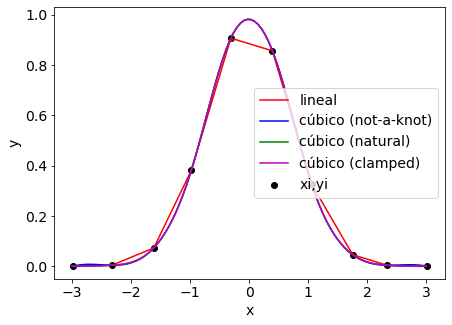

In [20]:
import matplotlib.pyplot as plt

x = np.linspace(-3,3,100)

plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 14}) # Tamaño de fuente

plt.plot(x,    y_slinear(x),'-r', label='lineal')
plt.plot(x,  y_scubic_nk(x),'-b', label='cúbico (not-a-knot)')
plt.plot(x, y_scubic_nat(x),'-g', label='cúbico (natural)')
plt.plot(x, y_scubic_cmp(x),'-m', label='cúbico (clamped)')
plt.scatter(xi,yi,color='k',label='xi,yi')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Precisión en la extrapolación por ```CubicSpline```

Las condiciones de borde en ```CubicSpline``` son importantes al momento de identificar la precisión de la extrapolación. Por ejemplo, evaluemos el error para la extrapolación en ```x0 = 4```. En este caso, el valor exácto está dado por $f(4) = e^{-4^2} = 1.12532\times 10^{-7}$

In [21]:
x0 = 4
y_exact = np.exp(-(x0)**2)
print("Error absoluto en 'not-a-knot': %.5e" % abs(y_exact - y_scubic_nk(x0)))
print("Error absoluto en 'natural': %.5e" % abs(y_exact - y_scubic_nat(x0)))
print("Error absoluto en 'clamped': %.5e" % abs(y_exact - y_scubic_cmp(x0)))

Error absoluto en 'not-a-knot': 2.65274e-01
Error absoluto en 'natural': 1.17985e-02
Error absoluto en 'clamped': 8.74198e-03
